In [13]:
# %% Imports

import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests
import csv
import matplotlib.pyplot as plt

In [14]:
def get_url(search_term, pages,template):
    """
    
    The get_url function returns a list of urls for the searched phrase and the number of pages
    
    :search_term: The name or expression of the item you're looking for on Amazon 
    :pages: The number of pages you want to scrape (< maximum number of web pages shown)
    
    """
    
    # template= 'https://www.amazon.in/s?k={}&page={}'
    template=template    
    urls= []
    if pages==1:
        search_term= search_term.replace(' ','+')
        url= template.format(search_term, 1)
        urls.append(url)
    
    for i in range(1,pages):
        search_term= search_term.replace(' ','+')
        url= template.format(search_term, i)
        urls.append(url)
    return urls


In [15]:
def scrape_record(item,website):
    """
    
    Scrape_record does scrape infos(Description, Rating, Reiew count ) of a particualar item an returned as a record
    
    :item: an html div where the infos are located
    
    """

    #Product's description
    if website=='amazon':
        atag= item.h2.a
        description= atag.text.strip()
        
        #Product's price
        try:
            price_parent= item.find('span','a-price')
            price= price_parent.find('span', 'a-offscreen').text
        except AttributeError:
            return
        
        #Product's rating
        try:
            rating= item.i.text.strip()[:3]
        except AttributeError:
            rating= 'None'
            
        #Product's reiew count    
        try:
            review_count= item.find('span',{'class': 'a-size-base s-underline-text'}).text
        except AttributeError:
            review_count= 'None'
        
        record= (description, price, rating, review_count)
    
        return record
    elif website=='flipkart':
        description= item.find('a','s1Q9rs').text.strip()
    
    #Product's price
        try:
            price_parent= item.find('div','_30jeq3').text
        except AttributeError:
            return
        
        #Product's rating
        try:
            rating= item.find('div','_3LWZlK').text
        except AttributeError:
            rating= 'None'
            
        #Product's reiew count    
        try:
            review_count= item.find('span','_2_R_DZ').text[1:-1]
        except AttributeError:
            review_count= 'None'
        
        record= (description, price_parent, rating, review_count)
        
        return record


In [16]:
def scrape_all_pages(urls,website):
    """
    The scrape_all_pages function loops over the urls and scrapes all items before saving the data in csv format.    
    
    :urls: list of urls generated by calling the get_url function
    """
    records= [] 
    amazon=0 
    flipkart=0
    for url in urls:
        headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
        page= requests.get(url, headers=headers) 
        soup= BeautifulSoup(page.content,'html.parser')
        if website=='amazon':
            results= soup.find_all('div',{'data-component-type':'s-search-result'})
            amazon=1
        elif website=='flipkart':
            results= soup.find_all('div',{'class':'_4ddWXP'})
            flipkart=1



        
        for item in results:
            if amazon:
                record= scrape_record(item,'amazon')
            elif flipkart:
                record= scrape_record(item,'flipkart')

            if record:
                records.append(record)
        
        # print(records)        
        fileName=''
    # Writing the rows into a csv file. If desired, this convertion set of code can be implemented as a function;
    if website=='amazon':
     
        fileName='amazonData.csv'
    elif website=='flipkart':
        fileName='flipkartData1.csv'



        
    with open(fileName, 'w', newline='', encoding='utf-8') as f:
            
            writer= csv.writer(f)
            writer.writerow(['Description', 'Price', 'Rating', 'Review_count'])
            writer.writerows(records)
    return records

In [27]:
try:
    user_choice=input('Enter Category ')
    no_of_pages=int(input('Enter number of pages '))
    urls= get_url(user_choice,no_of_pages,'https://www.amazon.in/s?k={}&page={}')
    records= scrape_all_pages(urls,'amazon')
    df1= pd.read_csv('amazonData.csv')
    pd.set_option('display.max_rows', None)

    urls=get_url(user_choice,no_of_pages,'https://www.flipkart.com/search?q={}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}')
    records=scrape_all_pages(urls,'flipkart')
    df2=pd.read_csv('flipkartData1.csv')
    pd.set_option('display.max_rows',None)
except Exception as e :
    print(e)


Enter Category  Pedigree dog food
Enter number of pages  1


In [18]:
import pandas as pd   
from IPython.display import display_html 

In [19]:
from IPython.display import display, HTML

df1_style = df1.style.set_caption("DF One")
df2_style = df2.style.set_caption("DF Two")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Description,Price,Rating,Review_count
0,"Pedigree Adult Dry Dog Food- (High Protein Variant) Chicken, Egg & Rice, 20kg Pack","₹4,224",4.400000,"6,815"
1,"Pedigree Adult Dry Dog Food, Chicken & Vegetables, 10kg Pack","₹2,390",4.400000,"21,361"
2,"Dog Meal Assortment, Variety Pack, Natural and Fresh, Ready to Eat Wet Dog Food 2.4 Kg 400gm/Can Pack 5+1",₹699,5.000000,1
3,"Pedigree Adult Wet Dog Food, Grilled Liver Chunks Flavour in Gravy with Vegetables, Pack of 30 Pouches ( 30 X 70 g )","₹1,170",4.400000,844
4,"Purepet Dry Cat Adult Food Mackerel Flavour, 6 kg Pack",₹899,4.300000,"1,938"
5,"Purepet Dry Cat Adult Food Ocean Fish Flavour, 6 kg Pack",₹899,4.300000,"3,350"
6,"Drools Puppy Dry Dog Food Chicken and Egg, 3kg with Free 1.2kg, Total 4.2 kg Pack",₹687,4.100000,"12,001"
7,"Meat Up Adult Dry Dog Food, 10 kg (Buy 1 Get 1 Free),Total 20 kg Pack","₹2,089",4.100000,"15,360"
8,"Whiskas Wet Food For Kittens (2-12 Months), Chicken In Gravy Flavour, 12 Pouches (12 X 85G), 1 Count",₹540,4.400000,"1,685"
9,"Drools Adult Dry Dog Food Optimum Performance , 10kg Pack","₹1,375",4.300000,"7,053"


In [20]:
def sort_item(website):
    pd.set_option('expand_frame_repr', False)
    pd.set_option('display.max_rows',None)
    user_df = ''
    if website == 'amazon':
        user_df = df1.copy()
    elif website == 'flipkart':
        user_df = df2.copy()
    elif website == 'merged':
        df1['Website'] = 'Amazon'
        df2['Website'] = 'Flipkart'
        user_df = pd.concat([df1, df2], ignore_index=True).copy()

    print('1. By rating')
    print('2. By reviews count')
    print('3. By price')
    choice = int(input("""
                       1. By rating 
                       2. By reviews count
                       3. By price """))
    
    if choice == 1 :
        # Sort DataFrame by 'Rating' column
        df_sorted = user_df.sort_values(by='Rating', ascending=False)
        print(df_sorted)
    elif choice == 2:
        user_df['Review_count'] = user_df['Review_count'].str.replace(',', '')

        # Convert 'Review_count' column to integer
        user_df['Review_count'] = pd.to_numeric(user_df['Review_count'], errors='coerce').fillna(0).astype(int)

        # Sort DataFrame by 'Review_count' column
        df_sorted = user_df.sort_values(by='Review_count', ascending=False)

        # Print the sorted DataFrame
        print(df_sorted)
    elif choice == 3:
        user_df['Price'] = user_df['Price'].str.replace('₹', '').str.replace(',', '')

        # Convert 'Price' column to numeric
        user_df['Price'] = pd.to_numeric(user_df['Price'], errors='coerce').fillna(0).astype(int)

        # Sort DataFrame by 'Price' column
        df_sorted = user_df.sort_values(by='Price', ascending=True)

        # Print the sorted DataFrame
        print(df_sorted)
    else:
        print('Invalid input !!')
        

In [84]:


def bar_differences2():
    # Read data from CSV files into DataFrames
    df_amazon = pd.read_csv("amazonData.csv")
    df_flipkart = pd.read_csv("flipkartData1.csv")

    # Extract price information
    prices_amazon_copy = (
        df_amazon["Price"].str.replace("₹", "").str.replace(",", "").astype(float)
    )
    prices_flipkart_copy = (
        df_flipkart["Price"].str.replace("₹", "").str.replace(",", "").astype(float)
    )

    # Calculate mean prices
    mean_price_amazon = prices_amazon_copy.mean()
    mean_price_flipkart = prices_flipkart_copy.mean()

    # Plot histogram for Amazon prices
    # plt.hist(
    #     prices_amazon_copy, bins=20, alpha=0.5, color="blue", label="Amazon Prices"
    # )

    # Plot histogram for Flipkart prices with adjusted parameters
    # plt.hist(
    #     prices_flipkart_copy,
    #     bins=5,
    #     alpha=0.5,
    #     color="green",
    #     label="Flipkart Prices"
    # )

    # Add vertical lines for mean prices
    # plt.axvline(
    #     mean_price_amazon,
    #     color="blue",
    #     linestyle="dashed",
    #     linewidth=1,
    #     label="Amazon Mean Price: {:.2f}".format(mean_price_amazon),
    # )
    # plt.axvline(
    #     mean_price_flipkart,
    #     color="green",
    #     linestyle="dashed",
    #     linewidth=1,
    #     label="Flipkart Mean Price: {:.2f}".format(mean_price_flipkart),
    # )

    # Add labels, title, and legend
    # plt.xlabel("Price")
    # plt.ylabel("Frequency")
    # plt.title("Comparison of Prices between Amazon and Flipkart")
    # plt.legend()

    prices = [mean_price_amazon, mean_price_flipkart]
    labels = ['Amazon Mean Price', 'Flipkart Mean Price']
    plt.pie(prices, labels=labels, autopct='%1.1f%%', startangle=140)
   
    plt.show()

# Call the function
bar_differences2()


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [ ]:
def bar_differences():
    # Read data from CSV files into DataFrames
    df_amazon = pd.read_csv("amazonData.csv")
    df_flipkart = pd.read_csv("flipkartData1.csv")

    # Ask user for choice
    print("Choose an option:")
    print("1. Histogram for Amazon prices")
    print("2. Histogram for Flipkart prices")
    print("3. Histogram for both Amazon and Flipkart prices")
    choice = int(input("Enter your choice (1/2/3): "))

    if choice == 1:
        plot_histogram(df_amazon["Price"], "Amazon Prices", "blue")
    elif choice == 2:
        plot_histogram(df_flipkart["Price"], "Flipkart Prices", "green")
    elif choice == 3:
        bar_differences2()
    else:

        print("Invalid choice. Please choose 1, 2, or 3.")
        
def plot_histogram(prices, label, color):
    # Extract price information
    prices_copy = (
        prices.str.replace("₹", "").str.replace(",", "").astype(float)
    )

    # Calculate mean price
    mean_price = prices_copy.mean()

    # Plot histogram
    plt.hist(
        prices_copy, bins=20, alpha=0.5, color=color, label=label
    )

    # Add vertical line for mean price
    plt.axvline(
        mean_price,
        color=color,
        linestyle="dashed",
        linewidth=1,
        label="Mean Price: {:.2f}".format(mean_price),
    )

    # Add labels, title, and legend
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.title("Histogram of Prices")
    plt.legend()

    # Show plot
    plt.show()

In [82]:
try:
    user_choice = int(input("""Choose an option:
    1. Sort  data
    2. Generate histogram of prices
    Enter your choice (1/2): """))

    if user_choice == 1:
        sort_choice = int(input("""Choose an option:
        1. Filter  Amazon Data
        2. Filter  Flipkart Data
        3. Filter  Both Amazon and Flipkart Data
        Enter your choice (1/2/3): """))

        if sort_choice == 1:
            sort_item('amazon')
        elif sort_choice == 2:
            sort_item('flipkart')
        elif sort_choice == 3:
            sort_item('merged')
        else:
            print('Invalid Input')

    elif user_choice == 2:
        bar_differences()

    else:
        print('Invalid Choice')
except Exception as e :
    print(e)



Choose an option:
    1. Sort  data
    2. Generate histogram of prices
    Enter your choice (1/2):  2


Choose an option:
1. Histogram for Amazon prices
2. Histogram for Flipkart prices
3. Histogram for both Amazon and Flipkart prices


Enter your choice (1/2/3):  3


posx and posy should be finite values


cannot convert float NaN to integer


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 2 Axes>

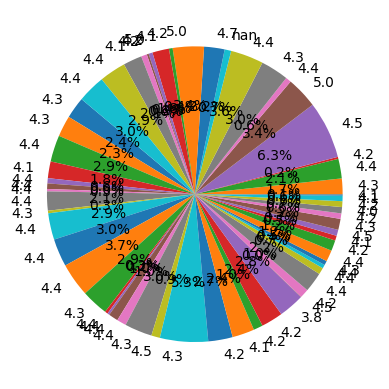

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_differences2():
    # Read data from CSV files into DataFrames
    df_amazon = pd.read_csv("amazonData.csv")
    df_flipkart = pd.read_csv("flipkartData1.csv")

    # Extract price information
    prices_amazon_copy = (
        df_amazon["Price"].str.replace("₹", "").str.replace(",", "").astype(float)
    )
    prices_flipkart_copy = (
        df_flipkart["Price"].str.replace("₹", "").str.replace(",", "").astype(float)
    )

    # Calculate mean prices
    mean_price_amazon = prices_amazon_copy.mean()
    mean_price_flipkart = prices_flipkart_copy.mean()

    prices = [mean_price_amazon, mean_price_flipkart]
    labels = ['Amazon Mean Price', 'Flipkart Mean Price']
    plt.pie(prices_amazon_copy, labels=df_amazon['Rating'], autopct='%1.1f%%', startangle=140)
   
    plt.show()

# Call the function
bar_differences2()
